In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
sample_df = pd.read_csv('../summary_data/aggregated_samples.csv')
for i in range(len(sample_df)):
    if type(sample_df.iloc[i, 0]) is str:
        if '-' in sample_df.iloc[i, 0]:
            sample_df.iloc[i, 0] = None
            #sample_df.iloc[i, 0] = np.average([float(sample_df.iloc[i, 0].split('-')[0]), 
            #                                   float(sample_df.iloc[i, 0].split('-')[1])])
        elif '+' in sample_df.iloc[i, 0]:
            # sample_df.iloc[i, 0] = None
            sample_df.iloc[i, 0] = (float(sample_df.iloc[i, 0].split('+')[0])*7 + 
                                    float(sample_df.iloc[i, 0].split('+')[1]))/365
        else:
            sample_df.iloc[i, 0] = float(sample_df.iloc[i, 0])
    

sample_df.loc[sample_df['Male.Female'] == "h", 'Male.Female'] = 'other'
#sample_df.loc[sample_df['Age'].isna(), 'Age'] = 0.0
#sample_df.loc[sample_df['Male.Female'].isna(), 'Male.Female'] = 'unknown'

sample_df = sample_df.astype({'Age': 'float64'})

sample_df.head()
#test = sample_df.groupby(['Study', 'Male.Female'])
#print(test['Age'])

,Age,Case.Control,Outcome,Male.Female,Study
0,NaN,control,NaN,NaN,GSE4607
1,NaN,control,NaN,NaN,GSE4607
2,NaN,control,NaN,NaN,GSE4607
3,NaN,control,NaN,NaN,GSE4607
4,NaN,control,NaN,NaN,GSE4607


In [147]:
cc_col = [sns.light_palette("green", reverse=True)[0], sns.light_palette("green", reverse=True)[4]]
mf_col = [sns.light_palette("navy", reverse=True)[0], sns.light_palette("navy", reverse=True)[2], 
          sns.light_palette("navy", reverse=True)[4]]

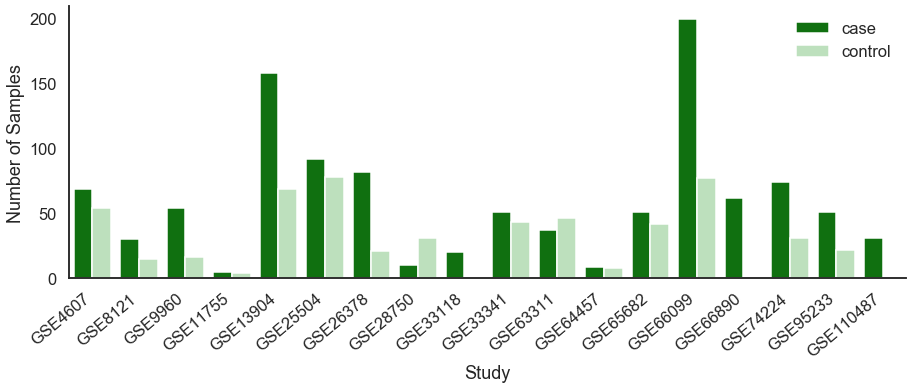

In [148]:
plt.figure(figsize=(15,5))
sns.set_style('white')
sns.set_context('talk')

samples = ['GSE4607', 'GSE8121', 'GSE9960', 'GSE11755', 'GSE13904', 'GSE25504', 'GSE26378', 'GSE28750', 'GSE33118',
           'GSE33341', 'GSE63311', 'GSE64457', 'GSE65682', 'GSE66099', 'GSE66890', 'GSE74224', 'GSE95233', 'GSE110487'
          ]

cc_df = sample_df.loc[:, ['Case.Control', 'Study']]
cc_df['count'] = 'Exists'
#mf_df.head()
cc_group = cc_df.groupby(['Study', 'Case.Control'], as_index=False).count().rename(columns={'count':'Num.Samples'})

g = sns.barplot(data=cc_group, x="Study", y="Num.Samples", hue="Case.Control", order = samples, 
                hue_order = ['case', 'control'], palette = cc_col)
g.set(ylabel = "Number of Samples")
plt.legend(frameon=False, loc = "upper right")
g.set_xticklabels(rotation=40, ha="right", labels = samples)
sns.despine()

plt.show()

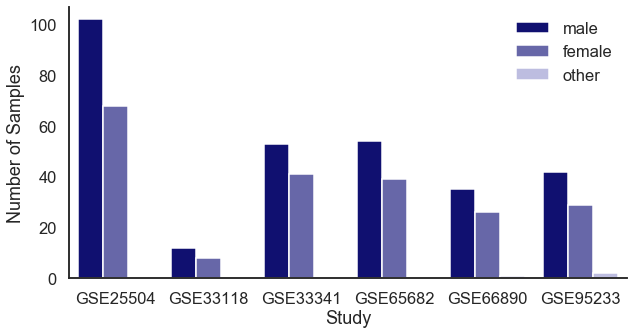

In [149]:
plt.figure(figsize=(10,5))
sns.set_style('white')
sns.set_context('talk')

mf_df = sample_df.loc[:, ['Male.Female', 'Case.Control', 'Study']].dropna()
#mf_df.head()

mf_group = mf_df.groupby(['Study', 'Male.Female'], as_index=False).count().rename(
    columns={'Case.Control':'Num.Samples'})

g = sns.barplot(data=mf_group, x="Study", y="Num.Samples", hue="Male.Female", 
                hue_order = ['male', 'female', 'other'], palette=mf_col)

g.set(ylabel = "Number of Samples")
plt.legend(frameon=False)
sns.despine()

plt.show()

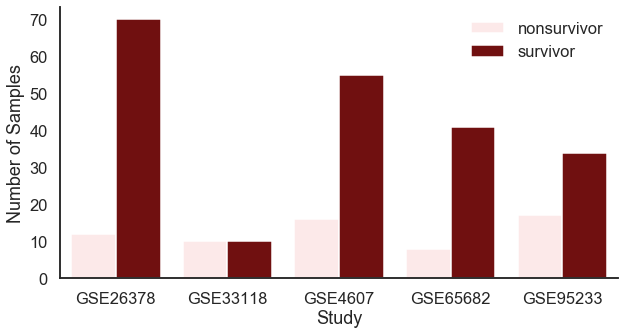

In [121]:
plt.figure(figsize=(10,5))
sns.set_style('white')
sns.set_context('talk')

out_df = sample_df.loc[:, ['Outcome', 'Case.Control', 'Study']].dropna()
#mf_df.head()
out_group = out_df.groupby(['Study', 'Outcome'], as_index=False).count().rename(
    columns={'Case.Control':'Num.Samples'})

g = sns.barplot(data=out_group, x="Study", y="Num.Samples", hue="Outcome", color = "maroon")
g.set(ylabel = "Number of Samples")
plt.legend(frameon=False)
sns.despine()

plt.show()

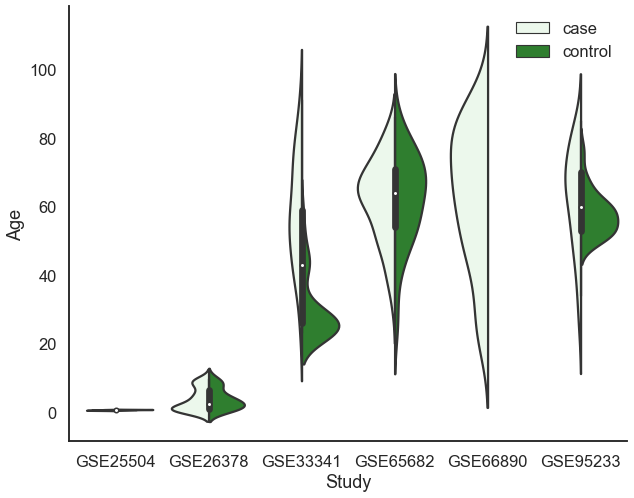

In [129]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.set_context('talk')

age_df = sample_df.loc[:, ['Age', 'Case.Control', 'Study']].dropna()
#age_df.head()

mf_group = mf_df.groupby(['Study'], as_index=False).count().rename(columns={'Case.Control':'Num.Samples'})

g = sns.violinplot(data=age_df, x="Study", y="Age", hue="Case.Control", split=True, hue_order = ['case', 'control'],
                   color="forestgreen")
plt.legend(frameon=False)
sns.despine()

plt.show()